# Reto


In [1]:
import pandas as pd
import numpy as np
import cv2
import os

In [2]:
filelist_df = pd.read_csv('EchoNet-Dynamic/FileList.csv')

# Cargar el archivo VolumeTracings.csv
volumetracings_df = pd.read_csv('EchoNet-Dynamic/VolumeTracings.csv')

In [30]:
videos = ['0X100009310A3BD7FC.avi', '0X1002E8FBACD08477.avi', '0X1005D03EED19C65B.avi', '0X10075961BC11C88E.avi', '0X10094BA0A028EAC3.avi', 
          '0X100CF05D141FF143.avi', '0X100E3B8D3280BEC5.avi', '0X100E491B3CD58DE2.avi', '0X100F044876B98F90.avi', '0X101026B90DAE7E95.avi']
frames = [46, 3, 24, 91, 137, 132, 25, 49, 56, 45]

print(videos)
print(frames)

['0X100009310A3BD7FC.avi', '0X1002E8FBACD08477.avi', '0X1005D03EED19C65B.avi', '0X10075961BC11C88E.avi', '0X10094BA0A028EAC3.avi', '0X100CF05D141FF143.avi', '0X100E3B8D3280BEC5.avi', '0X100E491B3CD58DE2.avi', '0X100F044876B98F90.avi', '0X101026B90DAE7E95.avi']
[46, 3, 24, 91, 137, 132, 25, 49, 56, 45]


In [61]:
# Filtrar los primeros 300 elementos nones de la columna 'FileName'
videos = volumetracings_df['FileName'][volumetracings_df.index % 2 != 0].unique().tolist()[:3000]

# Filtrar los primeros 300 elementos nones de la columna 'Frame'
frames = []
for video in videos:
    frame = volumetracings_df.loc[volumetracings_df['FileName'] == video, 'Frame'].values[0]
    frames.append(frame)

# Asegurarse de que ambas listas tengan 300 elementos
videos = videos
frames = frames

print(videos)
print(frames)

print(len(videos))
print(len(frames))

['0X100009310A3BD7FC.avi', '0X1002E8FBACD08477.avi', '0X1005D03EED19C65B.avi', '0X10075961BC11C88E.avi', '0X10094BA0A028EAC3.avi', '0X100CF05D141FF143.avi', '0X100E3B8D3280BEC5.avi', '0X100E491B3CD58DE2.avi', '0X100F044876B98F90.avi', '0X101026B90DAE7E95.avi', '0X1012703CDC1436FE.avi', '0X1013E8A4864781B.avi', '0X1018521A3BC5CDBA.avi', '0X101C388397F66EDB.avi', '0X101CFC9C5351DCBE.avi', '0X101E654AF3FC07A8.avi', '0X10267ADF2E644E0.avi', '0X102AE9C68B2C46DA.avi', '0X102C51641C321436.avi', '0X102CFB07F752AAE6.avi', '0X102DD1B9BE03716.avi', '0X102E453603FA1440.avi', '0X102E94908346DE1D.avi', '0X102F3D4CD5E10801.avi', '0X10365E52F01510B4.avi', '0X1039108E17193B1C.avi', '0X1039B49145DF4F25.avi', '0X103A55B2546EF36E.avi', '0X103BE163257D663A.avi', '0X1040C376CF369A01.avi', '0X1040D64234D3E916.avi', '0X1043D3D352972862.avi', '0X1045F1B5A0A5EA54.avi', '0X104D2C3D60AE3DE8.avi', '0X105039B849CDB1CD.avi', '0X10516E63208D8EA1.avi', '0X1055D6B76E5D7556.avi', '0X10569E00E4DFFF7D.avi', '0X1059077339E

### Rectas

In [ ]:
import numpy as np
import cv2
import os

# Inicializa una lista para almacenar los puntos
all_points = []

for i in range(len(videos)):

    # Crea el video_path
    video_path = os.path.join("EchoNet-Dynamic/Videos", videos[i])
    file_name = os.path.basename(video_path)
    
    # Obtiene el frame de interés
    frame_of_interest = frames[i]

    # Abre el video
    cap = cv2.VideoCapture(video_path)

    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error al abrir el video {video_path}")
    else:
        frame_count = 0

        while True:
            ret, frame = cap.read()

            if not ret:
                break  # Fin del video

            if frame_count == frame_of_interest:
                # Define la carpeta donde se guardará la imagen
                folder_path = "images"

                # Verifica si la carpeta existe, si no, la crea
                if not os.path.exists(folder_path):
                    os.makedirs(folder_path)

                # Guarda el frame como una imagen en la carpeta "images"
                frame_filename = os.path.join(folder_path, f"frame_{frame_of_interest}_{i}.jpg")
                cv2.imwrite(frame_filename, frame)

                print(f"Frame {frame_of_interest} del video {videos[i]} guardado como {frame_filename}")

                # Recolecta los puntos en lugar de crear la máscara inmediatamente
                mask_coords = volumetracings_df[volumetracings_df['FileName'] == file_name]
                
                current_points = []  # Almacenar los puntos actuales
                for index, row in mask_coords.iterrows():
                    x1, y1, x2, y2 = row['X1'], row['Y1'], row['X2'], row['Y2']
                    current_points.extend([(x1, y1), (x2, y2)])

                color=(0, 0, 0)
                all_points.append((current_points, color))  # Agrega los puntos actuales y el color a la lista

                break

            frame_count += 1

        # Libera la captura
        cap.release()

# Después de recolectar todos los puntos, conectar cada punto con su vértice más cercano
for i, (points, color) in enumerate(all_points):
    # Crear una máscara en blanco y negro
    mask = np.zeros_like(frame, dtype=np.uint8)

    # Conectar cada punto con su vértice más cercano
    for j in range(0, len(points), 2):
        # Determina el color en función de la posición de la iteración
        if j == 0:
            color = (0, 255, 0)  # Verde para la primera iteración
        elif 1 <= j <= 40:
            color = (0, 0, 255)  # Azul para las iteraciones del 2 al 11
        elif j == 42:
            color = (0, 255, 0)
        else:
            color = (255, 0, 0)  # Rojo para las iteraciones restantes

        x1, y1 = map(int, points[j])  # Convertir las coordenadas a enteros
        x2, y2 = map(int, points[j + 1])  # Convertir las coordenadas a enteros
        cv2.line(mask, (x1, y1), (x2, y2), color, 1)  # Conectar puntos con el color correspondiente

    # Guarda la máscara
    mask_filename = os.path.join("images", f"frame_{frames[i]}_lineMask.jpg")
    cv2.imwrite(mask_filename, mask)

    print(f"Máscara del frame {frames[i]} del video {videos[i]} guardada como {mask_filename}")


### Polígono

In [158]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def calculate_centroid(points):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    centroid_x = sum(x) / len(points)
    centroid_y = sum(y) / len(points)
    return centroid_x, centroid_y

def sort_points_clockwise(points):
    centroid_x, centroid_y = calculate_centroid(points)
    return sorted(points, key=lambda p: (np.arctan2(p[1] - centroid_y, p[0] - centroid_x), p[0]))


def refined_sort(points):
    sorted_points_angle = sort_points_clockwise(points)

    refined_points = [sorted_points_angle[0]]
    for i in range(1, len(sorted_points_angle)-1):
        current_point = sorted_points_angle[i]

        distances = [(np.linalg.norm(np.array(current_point) - np.array(sorted_points_angle[j])), j)
                     for j in range(i-1, min(i+2, len(sorted_points_angle)))]

        distances.sort(key=lambda x: x[0])

        refined_points.append(sorted_points_angle[distances[0][1]])

    refined_points.append(sorted_points_angle[-1])

    return refined_points

In [159]:
import numpy as np
import cv2
import os

# Inicializa una lista para almacenar los puntos y frames
all_points = []
image_width, image_height = 112, 112

for i in range(len(videos)):
    # Crea el video_path
    video_path = os.path.join("EchoNet-Dynamic/Videos", videos[i])
    file_name = os.path.basename(video_path)

    # Abre el video
    cap = cv2.VideoCapture(video_path)

    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error al abrir el video {video_path}")
    else:
        frame_count = 0

        ret, frame = cap.read()
        if ret:
            # Define la carpeta donde se guardarán las imágenes
            frame_path = "images/frames/"
            masks_folder = "images/masks/"
            
            # Verifica si la carpeta existe, si no, la crea
            if not os.path.exists(frame_path):
                os.makedirs(frame_path)
            if not os.path.exists(masks_folder):
                os.makedirs(masks_folder)

            # Guarda el primer frame como una imagen en la carpeta "images"
            frame_filename = os.path.join(frame_path, f"{videos[i]}_{frames[i]}.jpg")
            cv2.imwrite(frame_filename, frame)

            print(f"Frame {frames[i]} del video {videos[i]} guardado como {frame_filename}")

            mask = np.zeros((image_height, image_width), dtype=np.uint8)
            frame_data = volumetracings_df[volumetracings_df['FileName'] == file_name]
            points = [(int(row['X1']), int(row['Y1'])) for _, row in frame_data.iterrows()] + [(int(row['X2']), int(row['Y2'])) for _, row in frame_data.iterrows()]
            polygon_points = refined_sort(points)
            polygon_points = np.array(polygon_points, dtype=np.int32).reshape((1, -1, 2))
            cv2.fillPoly(mask, [polygon_points], (255))

            mask_filename = os.path.join(masks_folder, f"{videos[i]}_{frames[i]}_binaryMask.jpg")
            cv2.imwrite(mask_filename, mask)


            print(f"Máscara del frame {frames[i]} del video {videos[i]} guardada como {mask_filename}")

        # Libera la captura
        cap.release()


Frame 46 del video 0X100009310A3BD7FC.avi guardado como images/frames/0X100009310A3BD7FC.avi_46.jpg
Máscara del frame 46 del video 0X100009310A3BD7FC.avi guardada como images/masks/0X100009310A3BD7FC.avi_46_binaryMask.jpg
Frame 3 del video 0X1002E8FBACD08477.avi guardado como images/frames/0X1002E8FBACD08477.avi_3.jpg
Máscara del frame 3 del video 0X1002E8FBACD08477.avi guardada como images/masks/0X1002E8FBACD08477.avi_3_binaryMask.jpg
Frame 24 del video 0X1005D03EED19C65B.avi guardado como images/frames/0X1005D03EED19C65B.avi_24.jpg
Máscara del frame 24 del video 0X1005D03EED19C65B.avi guardada como images/masks/0X1005D03EED19C65B.avi_24_binaryMask.jpg
Frame 91 del video 0X10075961BC11C88E.avi guardado como images/frames/0X10075961BC11C88E.avi_91.jpg
Máscara del frame 91 del video 0X10075961BC11C88E.avi guardada como images/masks/0X10075961BC11C88E.avi_91_binaryMask.jpg
Frame 137 del video 0X10094BA0A028EAC3.avi guardado como images/frames/0X10094BA0A028EAC3.avi_137.jpg
Máscara del fr

In [160]:
import numpy as np
import cv2
import os

# Inicializa una lista para almacenar los puntos y frames
all_points = []
image_width, image_height = 112, 112

for i in range(len(videos)):
    # Crea el video_path
    video_path = os.path.join("EchoNet-Dynamic/Videos", videos[i])
    file_name = os.path.basename(video_path)

    # Abre el video
    cap = cv2.VideoCapture(video_path)

    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error al abrir el video {video_path}")
    else:
        frame_count = 0

        ret, frame = cap.read()
        if ret:
            # Define la carpeta donde se guardarán las imágenes
            frame_path = "images/frames/"
            masks_folder = "images/masks/"
            
            # Verifica si la carpeta existe, si no, la crea
            if not os.path.exists(frame_path):
                os.makedirs(frame_path)
            if not os.path.exists(masks_folder):
                os.makedirs(masks_folder)

            # Guarda el primer frame como una imagen en la carpeta "images"
            frame_filename = os.path.join(frame_path, f"{videos[i]}_{frames[i]}.jpg")
            cv2.imwrite(frame_filename, frame)

            print(f"Frame {frames[i]} del video {videos[i]} guardado como {frame_filename}")

            # Recolecta los puntos en lugar de crear la máscara inmediatamente
            mask_coords = volumetracings_df[volumetracings_df['FileName'] == file_name]

            current_points = []  # Almacena los puntos actuales
            for index, row in mask_coords.iterrows():
                x1, y1, x2, y2 = row['X1'], row['Y1'], row['X2'], row['Y2']
                current_points.extend([(x1, y1), (x2, y2)])

            all_points.append(current_points)  # Agrega los puntos actuales a la lista

            # Después de recolectar los puntos, crear una máscara para el frame actual
            # Crear una máscara en blanco y negro
            mask = np.zeros(frame.shape[:2], dtype=np.uint8)  # Solo un canal, sin necesidad de 3 canales

            # Convertir los puntos en un formato adecuado para cv2.polylines
            polygon_points = np.array(current_points, dtype=np.int32).reshape((-1, 1, 2))

            # Dibujar el polígono en la máscara
            cv2.polylines(mask, [polygon_points], isClosed=True, color=255, thickness=3)  # Color en blanco (255)

            # Después de crear la máscara, aplica dilatación seguida de erosión
            kernel = np.ones((8, 8), np.uint8)
            dilated_mask = cv2.dilate(mask, kernel, iterations=1)
            smoothed_mask = cv2.erode(dilated_mask, kernel, iterations=1)

            # Guardar la máscara suavizada en blanco y negro
            mask_filename = os.path.join(masks_folder, f"{videos[i]}_{frames[i]}_binaryMask.jpg")
            cv2.imwrite(mask_filename, smoothed_mask)

            print(f"Máscara del frame {frames[i]} del video {videos[i]} guardada como {mask_filename}")

        # Libera la captura
        cap.release()


Frame 46 del video 0X100009310A3BD7FC.avi guardado como images/frames/0X100009310A3BD7FC.avi_46.jpg
Máscara del frame 46 del video 0X100009310A3BD7FC.avi guardada como images/masks/0X100009310A3BD7FC.avi_46_binaryMask.jpg
Frame 3 del video 0X1002E8FBACD08477.avi guardado como images/frames/0X1002E8FBACD08477.avi_3.jpg
Máscara del frame 3 del video 0X1002E8FBACD08477.avi guardada como images/masks/0X1002E8FBACD08477.avi_3_binaryMask.jpg
Frame 24 del video 0X1005D03EED19C65B.avi guardado como images/frames/0X1005D03EED19C65B.avi_24.jpg
Máscara del frame 24 del video 0X1005D03EED19C65B.avi guardada como images/masks/0X1005D03EED19C65B.avi_24_binaryMask.jpg
Frame 91 del video 0X10075961BC11C88E.avi guardado como images/frames/0X10075961BC11C88E.avi_91.jpg
Máscara del frame 91 del video 0X10075961BC11C88E.avi guardada como images/masks/0X10075961BC11C88E.avi_91_binaryMask.jpg
Frame 137 del video 0X10094BA0A028EAC3.avi guardado como images/frames/0X10094BA0A028EAC3.avi_137.jpg
Máscara del fr

### Poligonos divididos (EDV / ESV)

In [ ]:
import numpy as np
import cv2
import os

# Inicializa una lista para almacenar los puntos
all_points = []

for i in range(len(videos)):

    # Crea el video_path
    video_path = os.path.join("EchoNet-Dynamic/Videos", videos[i])
    file_name = os.path.basename(video_path)
    
    # Obtiene el frame de interés
    frame_of_interest = frames[i]

    # Abre el video
    cap = cv2.VideoCapture(video_path)

    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"Error al abrir el video {video_path}")
    else:
        frame_count = 0

        while True:
            ret, frame = cap.read()

            if not ret:
                break  # Fin del video

            if frame_count == frame_of_interest:
                # Define la carpeta donde se guardará la imagen
                folder_path = "images"

                # Verifica si la carpeta existe, si no, la crea
                if not os.path.exists(folder_path):
                    os.makedirs(folder_path)

                # Guarda el frame como una imagen en la carpeta "images"
                frame_filename = os.path.join(folder_path, f"frame_{frame_of_interest}_{i}.jpg")
                cv2.imwrite(frame_filename, frame)

                print(f"Frame {frame_of_interest} del video {videos[i]} guardado como {frame_filename}")

                # Recolecta los puntos en lugar de crear la máscara inmediatamente
                mask_coords = volumetracings_df[volumetracings_df['FileName'] == file_name]
                
                current_points = []  # Almacenar los puntos actuales
                for index, row in mask_coords.iterrows():
                    x1, y1, x2, y2 = row['X1'], row['Y1'], row['X2'], row['Y2']
                    current_points.extend([(x1, y1), (x2, y2)])

                all_points.append((current_points, color))  # Agrega los puntos actuales y el color a la lista

                break

            frame_count += 1

        # Libera la captura
        cap.release()

# Inicializa los colores
blue_color = (0, 0, 255)  # Azul
red_color = (255, 0, 0)  # Rojo

# Después de recolectar todos los puntos, crear dos imágenes diferentes con dos máscaras distintas
for i, (points, color) in enumerate(all_points):
    # Crear una máscara en blanco y negro
    mask_x1y1 = np.zeros_like(frame, dtype=np.uint8)
    mask_x2y2 = np.zeros_like(frame, dtype=np.uint8)

    # Conectar cada punto con su vértice más cercano
    for j in range(0, len(points), 2):
        x1, y1 = map(int, points[j])  # Convertir las coordenadas a enteros
        x2, y2 = map(int, points[j + 1])  # Convertir las coordenadas a enteros
        if j < 21 * 2:
            cv2.polylines(mask_x1y1, [np.array([(x1, y1), (x2, y2)], dtype=np.int32)], isClosed=True, color=blue_color, thickness=3)
        else:
            cv2.polylines(mask_x2y2, [np.array([(x1, y1), (x2, y2)], dtype=np.int32)], isClosed=True, color=red_color, thickness=3)

    # Guardar las máscaras en imágenes separadas
    mask_x1y1_filename = os.path.join("images", f"frame_{frames[i]}_polyMask_EDV.jpg")
    mask_x2y2_filename = os.path.join("images", f"frame_{frames[i]}_polyMask_ESV.jpg")

    cv2.imwrite(mask_x1y1_filename, mask_x1y1)
    cv2.imwrite(mask_x2y2_filename, mask_x2y2)

    print(f"Máscara x1y1 del frame {frames[i]} del video {videos[i]} guardada como {mask_x1y1_filename}")
    print(f"Máscara x2y2 del frame {frames[i]} del video {videos[i]} guardada como {mask_x2y2_filename}")


## Red Neuronal (CNN) para obtención de máscaras

### Carga y procesamiento de imágenes

In [205]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, Concatenate
from keras.models import Model
from tensorflow.keras import layers, models


image_dir = 'images/frames'
mask_dir = 'images/masks'

# Obtener lista de nombres de archivos
image_files = os.listdir(image_dir)
mask_files = os.listdir(mask_dir)

# Función para cargar y preprocesar imágenes y máscaras
def load_and_preprocess_data(image_files, mask_files):
    images = []
    masks = []
    for image_file in image_files:
        # Obtener el nombre base del archivo
        base_name = os.path.splitext(image_file)[0]
        # Construir el nombre del archivo de máscara correspondiente
        mask_file = base_name + '_binaryMask.jpg'
        
        # Cargar imágenes y máscaras
        image = cv2.imread(os.path.join(image_dir, image_file), cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(os.path.join(mask_dir, mask_file), cv2.IMREAD_GRAYSCALE)

        # Verificar si las imágenes se cargan correctamente
        if image is None or mask is None:
            print(f"Error al cargar {image_file} o {mask_file}")
            continue
        
        # Asegurarse de que todas las imágenes sean del mismo tamaño
        image = cv2.resize(image, (128, 128))
        mask = cv2.resize(mask, (128, 128))
        
        # Normalizar imágenes y máscaras
        image = image / 255.0
        mask = mask / 255.0

        mask = mask > 0.5 + 0.0
        
        # Agregar el canal de profundidad (shape=(128, 128, 1))
        image = tf.expand_dims(image, axis=-1)
        mask = tf.expand_dims(mask, axis=-1)
        
        images.append(image)
        masks.append(mask)
    
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    masks = tf.convert_to_tensor(masks, dtype=tf.float32)
    
    return images, masks

# Cargar y preprocesar los datos
images, masks = load_and_preprocess_data(image_files, mask_files)

# Dividir los datos en conjuntos de entrenamiento y prueba
split_ratio = 0.8
split_index = int((len(images)-200) * split_ratio)

train_images = images[:split_index]
train_masks = masks[:split_index]
validation_images = images[split_index:]
validation_masks = masks[split_index:]

test_images = images[-200:]
test_masks = masks[-200:]

Error al cargar .DS_Store o .DS_Store_binaryMask.jpg


[ WARN:0@1871422.929] global loadsave.cpp:248 findDecoder imread_('images/masks/.DS_Store_binaryMask.jpg'): can't open/read file: check file path/integrity


In [168]:
image_dir = 'images/Test images/'
test_frames_dir = os.path.join(image_dir, 'Test Frames')
test_masks_dir = os.path.join(image_dir, 'Test Masks')

# Crear la carpeta 'Test images' si no existe
if not os.path.exists(test_frames_dir):
    os.makedirs(test_frames_dir)

if not os.path.exists(test_masks_dir):
    os.makedirs(test_masks_dir)

file_names = videos[3000:3200]

# Función para guardar imágenes y máscaras en el formato especificado
def save_test_images_and_masks(test_images, test_masks, output_dir_frames, output_dir_masks):
    for i in range(len(test_images)):
        # Construir nombres de archivo
        image_filename = os.path.join(output_dir_frames, f'{file_names[i]}_test_frame.jpg')
        mask_filename = os.path.join(output_dir_masks, f'{file_names[i]}_test_mask.jpg')

        # Obtener las imágenes y máscaras correspondientes
        image = test_images[i].numpy() * 255.0
        mask = test_masks[i].numpy() * 255.0

        # Guardar imágenes y máscaras
        cv2.imwrite(image_filename, image)
        cv2.imwrite(mask_filename, mask)

# Guardar las imágenes y máscaras de prueba en 'Test images'
save_test_images_and_masks(test_images, test_masks, test_frames_dir, test_masks_dir)

### Data Augmentation

In [64]:
import math

# Definir la función para rotar la imagen en 20 grados
def rotate_image(image, mask, degrees=20):
    angle = math.radians(degrees)
    image_shape = tf.shape(image)
    mask_shape = tf.shape(mask)
    
    # Centrar la imagen y la máscara
    image_center = [image_shape[0] / 2, image_shape[1] / 2]
    mask_center = [mask_shape[0] / 2, mask_shape[1] / 2]
    
    # Crear matrices de transformación
    transform_matrix_image = tf.linalg.affine2d_to_resampler(tf.linalg.Affine2D().rotate_around(image_center[0], image_center[1], angle))
    transform_matrix_mask = tf.linalg.affine2d_to_resampler(tf.linalg.Affine2D().rotate_around(mask_center[0], mask_center[1], angle))

    # Aplicar la rotación a la imagen y la máscara
    rotated_image = tf.raw_ops.ImageProjectiveTransformV2(images=tf.expand_dims(image, axis=0), transforms=tf.expand_dims(transform_matrix_image, axis=0), output_shape=image_shape)
    rotated_mask = tf.raw_ops.ImageProjectiveTransformV2(images=tf.expand_dims(mask, axis=0), transforms=tf.expand_dims(transform_matrix_mask, axis=0), output_shape=mask_shape)

    return rotated_image[0], rotated_mask[0]

In [66]:
import tensorflow as tf
import tensorflow_addons as tfa

# Definir la función de data augmentation para imágenes y máscaras
def augment_data(images, masks, times=3):
    target_size = (128, 128)
    
    augmented_images = []
    augmented_masks = []

    # Iterar solo hasta el elemento 1600
    for i in range(min(1600, len(images))):
        image = images[i]
        mask = masks[i]

        # Replicar la imagen y la máscara original (una vez, así tendremos 4 copias en total)
        augmented_images.append(image)
        augmented_masks.append(mask)

        for t in range(times):
            # Aplicar las transformaciones con el mismo tamaño
            if t == 0:  # Rotar 20 grados
                # Rotar la imagen y la máscara 20 grados
                angle = 20 * 3.1416 / 180  # Convertir a radianes
                image_shape = tf.shape(image)
                image_center = [image_shape[0] / 2, image_shape[1] / 2]
                
                # Rotar la imagen
                augmented_image = tfa.image.rotate(image, angle, interpolation='BILINEAR')
                augmented_mask = tfa.image.rotate(mask, angle, interpolation='BILINEAR')
                
                augmented_image = tf.image.resize(augmented_image, target_size)
                augmented_mask = tf.image.resize(augmented_mask, target_size)
            elif t == 1:  # Zoom de 0.2
                augmented_image = tf.image.central_crop(image, central_fraction=0.8)
                augmented_mask = tf.image.central_crop(mask, central_fraction=0.8)
                
                augmented_image = tf.image.resize(augmented_image, target_size)
                augmented_mask = tf.image.resize(augmented_mask, target_size)
            elif t == 2:  # Flip horizontal
                augmented_image = tf.image.flip_left_right(image)
                augmented_mask = tf.image.flip_left_right(mask)

            augmented_images.append(augmented_image)
            augmented_masks.append(augmented_mask)
    
    # Añadir el resto de elementos sin data augmentation
    for i in range(1600, len(images)):
        augmented_images.append(images[i])
        augmented_masks.append(masks[i])

    return tf.convert_to_tensor(augmented_images), tf.convert_to_tensor(augmented_masks)

# Aplicar data augmentation a los conjuntos de entrenamiento
augmented_train_images, augmented_train_masks = augment_data(train_images, train_masks)

# Verificar las formas de los nuevos conjuntos de imágenes y máscaras
print("Forma de las imágenes de entrenamiento aumentadas:", augmented_train_images.shape)
print("Forma de las máscaras de entrenamiento aumentadas:", augmented_train_masks.shape)


Forma de las imágenes de entrenamiento aumentadas: (7200, 128, 128, 1)
Forma de las máscaras de entrenamiento aumentadas: (7200, 128, 128, 1)


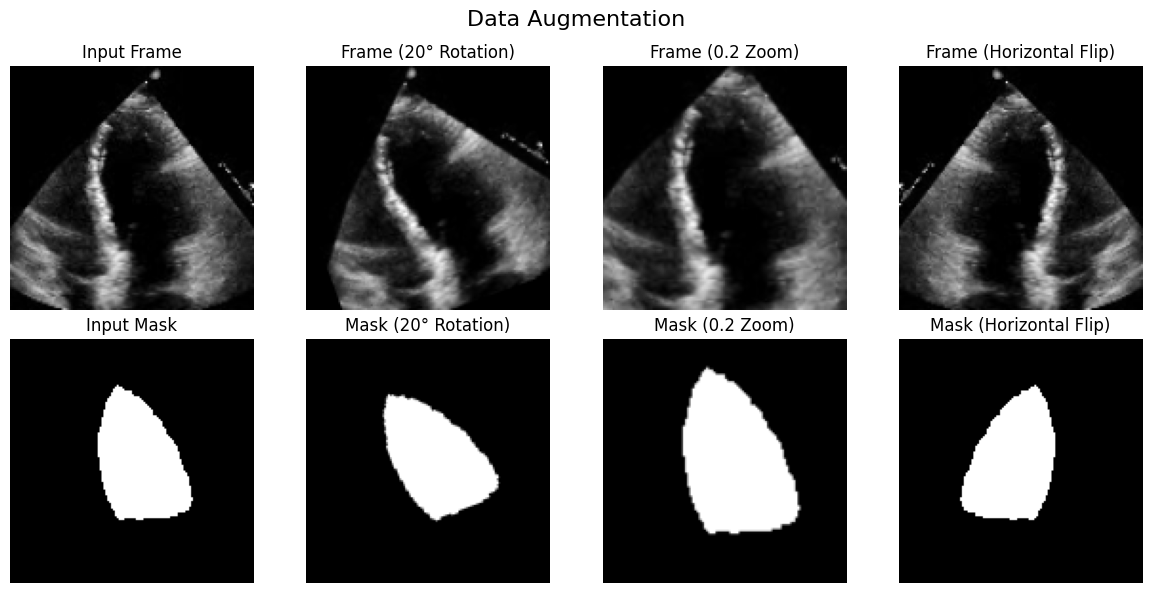

In [195]:
import matplotlib.pyplot as plt

# Seleccionar un índice aleatorio para mostrar las imágenes
index = 2  # Puedes cambiar este índice para visualizar diferentes imágenes

# Crear una figura con 2 filas y 4 columnas para mostrar las imágenes
plt.figure(figsize=(12, 6))

# Mostrar la imagen original y su máscara correspondiente
plt.subplot(2, 4, 1)
plt.imshow(train_images[index][:, :, 0], cmap='gray')
plt.title('Input Frame')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(train_masks[index][:, :, 0], cmap='gray')
plt.title('Input Mask')
plt.axis('off')
plt.suptitle('Data Augmentation', fontsize=16)

titles = ['(20° Rotation)', '(0.2 Zoom)', '(Horizontal Flip)']

# Mostrar las imágenes y máscaras aumentadas
for i in range(1, 4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(augmented_train_images[index * 4 + i][:, :, 0], cmap='gray')
    plt.title(f'Frame {titles[i - 1]}')
    plt.axis('off')

    plt.subplot(2, 4, i + 5)
    plt.imshow(augmented_train_masks[index * 4 + i][:, :, 0], cmap='gray')
    plt.title(f'Mask {titles[i - 1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Definición del modelo

In [200]:
def unet_model(input_size=(128, 128, 1)):
    inputs = keras.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    conv1 = layers.Dropout(0.3)(conv1)  # Add dropout layer
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    conv2 = layers.Dropout(0.3)(conv2)  # Add dropout layer
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    conv3 = layers.Dropout(0.3)(conv3)  # Add dropout layer
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    conv4 = layers.Dropout(0.3)(conv4)  # Add dropout layer
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    conv5 = layers.Dropout(0.3)(conv5)  # Add dropout layer


    up1 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv5)
    up1 = layers.concatenate([up1, conv4], axis=3)

    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up1)
    conv6 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up2 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv6)
    up2 = layers.concatenate([up2, conv3], axis=3)

    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up2)
    conv7 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up3 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv7)
    up3 = layers.concatenate([up3, conv2], axis=3)

    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up3)
    conv8 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up4 = layers.Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv8)
    up4 = layers.concatenate([up4, conv1], axis=3)

    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up4)
    conv9 = layers.Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    # Output Layer
    conv10 = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = keras.Model(inputs=inputs, outputs=conv10)

    return model

# Crear el modelo
model = unet_model()

def dice_coefficient(y_true, y_pred):
    y_true = tf.image.resize(y_true, (128, 128))  # Redimensionar las salidas esperadas a (128, 128)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-15) / (union + 1e-15)

def dice_loss(y_true, y_pred):
    y_true = tf.image.resize(y_true, (128, 128))  # Redimensionar las salidas esperadas a (128, 128)
    return  1 - dice_coefficient(y_true, y_pred)

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss=dice_loss, metrics=[dice_coefficient])

# Resumen del modelo
print(model.summary())

# Entrenar el modelo
history = model.fit(augmented_train_images, augmented_train_masks, validation_data=(validation_images, validation_masks), epochs=20, batch_size=32)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_171 (Conv2D)         (None, 128, 128, 32)         320       ['input_10[0][0]']            
                                                                                                  
 conv2d_172 (Conv2D)         (None, 128, 128, 32)         9248      ['conv2d_171[0][0]']          
                                                                                                  
 dropout_25 (Dropout)        (None, 128, 128, 32)         0         ['conv2d_172[0][0]']          
                                                                                            

In [78]:
# Guardar el modelo entrenado
model.save("masks_model.h5")

/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


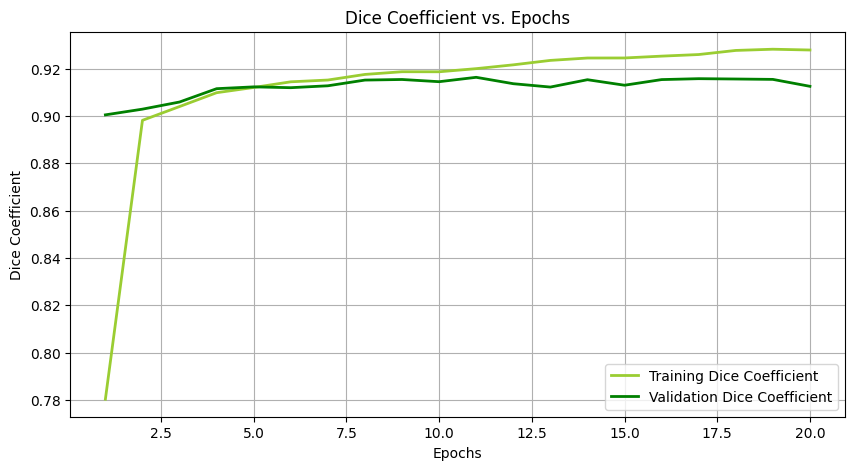

In [201]:
import matplotlib.pyplot as plt

# Extraer las métricas de entrenamiento y validación
dice_coefficient = history.history['dice_coefficient']
val_dice_coefficient = history.history['val_dice_coefficient']

# Crear un rango de épocas para el eje X
epochs = range(1, len(dice_coefficient) + 1)

# Graficar la métrica dice_coefficient
plt.figure(figsize=(10, 5))
plt.plot(epochs, dice_coefficient, color='yellowgreen', label='Training Dice Coefficient', linewidth=2)
plt.plot(epochs, val_dice_coefficient, 'g', label='Validation Dice Coefficient', linewidth=2)
plt.title('Dice Coefficient vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.legend()
plt.grid()
plt.show()


In [87]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer


Python(48541) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(48545) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### Visualización de resultados

1/1 [==============================] - 0s 293ms/step


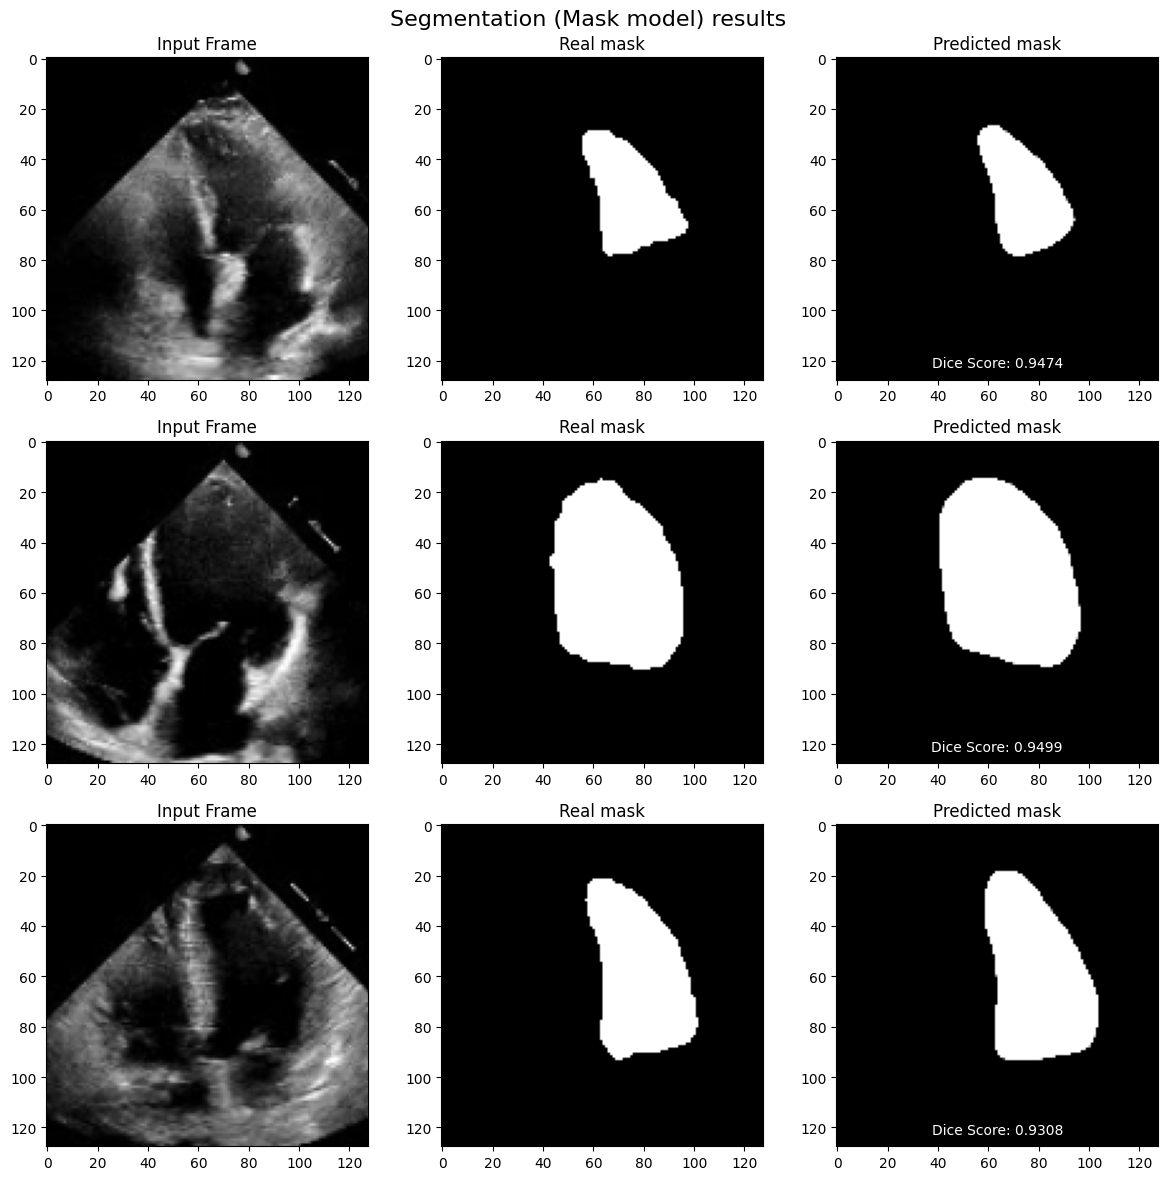

In [212]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

startFrame = 4

# Predecir máscaras para las primeras 3 imágenes de prueba
predicted_masks = model.predict(test_images[startFrame:startFrame + 3])

# Crear una figura con 3 columnas y 3 filas
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Segmentation (Mask model) results', fontsize=16)

for i in range(3):
    # Primera columna: imagen de entrada
    axs[i, 0].imshow(test_images[i + startFrame], cmap='gray')
    axs[i, 0].set_title('Input Frame')

    # Segunda columna: máscara real
    axs[i, 1].imshow(test_masks[i + startFrame], cmap='gray')
    axs[i, 1].set_title('Real mask')
    
    # Tercera columna: máscara predicha (aplicando post-procesamiento)
    processed_mask = predicted_masks[i]
    axs[i, 2].imshow(processed_mask, cmap='gray')
    axs[i, 2].set_title('Predicted mask')

    # Calcular el Dice score
    dice_score = dice_coefficient(test_masks[i + startFrame], processed_mask)

    # Mostrar el valor del Dice score en la imagen
    axs[i, 2].text(0.5, 0.05, f'Dice Score: {dice_score:.4f}', 
                   size=10, ha="center", va="center", color='white', transform=axs[i, 2].transAxes)

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

### Dice score promedio

In [207]:
def dice_coefficient(y_true, y_pred):
    y_true = tf.image.resize(y_true, (128, 128))  # Redimensionar las salidas esperadas a (128, 128)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-15) / (union + 1e-15)

In [208]:
# Obtenemos las predicciones del conjunto de test y calculamos el dice score promedio.

predicted_masks = model.predict(test_images)
dice_scores = []

for i in range(len(predicted_masks)):
    dice_score = dice_coefficient(test_masks[i], predicted_masks[i])
    dice_scores.append(dice_score)

print(f"Dice score promedio (en el conjunto de test): {np.mean(dice_scores):.4f}")

7/7 [==============================] - 4s 574ms/step
Dice score promedio (en el conjunto de test): 0.9024


### Histograma de Dice score (máscara vs predicción)

In [210]:
# Eliminamos el valor mínimo (outlier) y volvemos a calcular el dice score promedio.
dice_scores.remove(np.min(dice_scores))

print(f"Dice score promedio (en el conjunto de test): {np.mean(dice_scores):.4f}")

Dice score promedio (en el conjunto de test): 0.9067


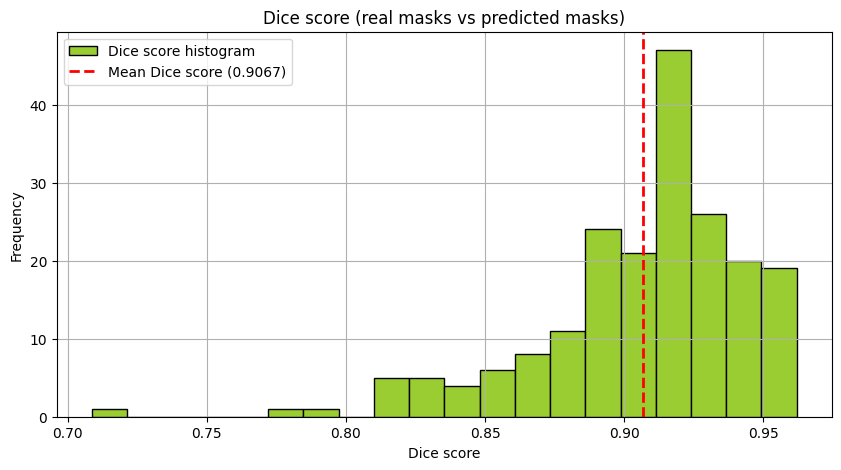

In [211]:
# Histograma de los valores del Dice score

plt.figure(figsize=(10, 5))
plt.hist(dice_scores, bins=20, color='yellowgreen', label='Dice score histogram', edgecolor='black')
plt.title('Dice score (real masks vs predicted masks)')
plt.axvline(x=np.mean(dice_scores), color='r', linestyle='dashed', linewidth=2, label=f'Mean Dice score ({np.mean(dice_scores):.4f})')
plt.xlabel('Dice score')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## Conversión de Video a Máscaras

1/1 [==============================] - 0s 31ms/step


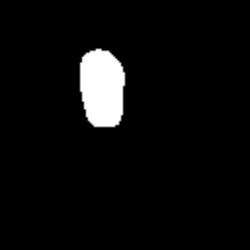

In [218]:
import cv2
import numpy as np
import imageio
import os
from IPython.display import Image


def preprocess_frame(frame):
    # Redimensiona el frame a 128x128 y conviértelo a escala de grises
    frame = cv2.resize(frame, (128, 128))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = frame[:, :, np.newaxis]  # Agrega una dimensión para obtener (128, 128, 1)
    return frame

def apply_model_to_video(model, video_name, gif_output_name):
    video_path = f'EchoNet-Dynamic/Videos 2/{video_name}'
    
    # Abre el video de entrada
    cap = cv2.VideoCapture(video_path)
    
    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"No se pudo abrir el video {video_name}. Asegúrate de que el archivo existe en la ubicación especificada.")
        return
    
    # Obtén las propiedades del video
    width = int(cap.get(3))
    height = int(cap.get(4))
    fps = int(cap.get(5))
    
    frame_count = 0
    frames = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocesa el frame
        preprocessed_frame = preprocess_frame(frame)
        
        # Reformatea el frame para que sea 4D (batch_size, height, width, channels)
        preprocessed_frame = preprocessed_frame[np.newaxis, ...]
        
        # Aplica el modelo al frame preprocesado
        prediction = model.predict(preprocessed_frame)
        
        # Almacena los frames en la lista
        frames.append((prediction[0, ..., 0] * 255).astype(np.uint8))  # Escala de 0 a 255
        
        frame_count += 1
    
    # Cierra el video de entrada
    cap.release()

    # Redimensionamos los frames a 250x250
    resized_frames = [cv2.resize(frame, (250, 250)) for frame in frames]
    
    # Guarda los frames como un GIF
    imageio.mimsave(gif_output_name, resized_frames, fps=fps)
    
    # Muestra el GIF en la salida de la celda
    return Image(filename=gif_output_name)

# Especifica el nombre del video que deseas procesar y el nombre del archivo GIF de salida
video_name = '00023.avi'  # Asegúrate de que el video esté en 'EchoNet-Dynamic/Videos/'
gif_output_name = 'masked_00023.gif'

# Llama a la función para procesar el video y mostrar el resultado como un GIF
gif = apply_model_to_video(model, video_name, gif_output_name)
gif


1/1 [==============================] - 0s 35ms/step


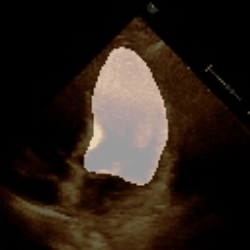

In [96]:
import cv2
import numpy as np
import imageio
import os
from IPython.display import Image

def preprocess_frame(frame):
    # Redimensiona el frame a 128x128 y conviértelo a escala de grises
    frame = cv2.resize(frame, (128, 128))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return frame

def apply_model_to_video(model, video_name, gif_output_name):
    video_path = f'EchoNet-Dynamic/Videos/{video_name}'
    
    # Abre el video de entrada
    cap = cv2.VideoCapture(video_path)
    
    # Verifica si el video se abrió correctamente
    if not cap.isOpened():
        print(f"No se pudo abrir el video {video_name}. Asegúrate de que el archivo existe en la ubicación especificada.")
        return
    
    # Obtén las propiedades del video
    width = int(cap.get(3))
    height = int(cap.get(4))
    fps = int(cap.get(5))
    
    frame_count = 0
    frames = []
    masks = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Preprocesa el frame
        preprocessed_frame = preprocess_frame(frame)
        
        # Reformatea el frame para que sea 4D (batch_size, height, width, channels)
        preprocessed_frame = preprocessed_frame[np.newaxis, ..., np.newaxis]  # Agrega una dimensión para obtener (1, 128, 128, 1)
        
        # Aplica el modelo al frame preprocesado
        prediction = model.predict(preprocessed_frame)
        
        # Almacena los frames en la lista
        frames.append(frame)
        masks.append((prediction[0, ..., 0] * 255).astype(np.uint8)[:, :, np.newaxis])
        
        frame_count += 1
    
    # Cierra el video de entrada
    cap.release()
    
    # Redimensiona las imágenes originales y las máscaras a (250, 250)
    resized_frames = [cv2.resize(frame, (250, 250)) for frame in frames]
    resized_masks = [cv2.resize(mask, (250, 250)) for mask in masks]
    # Convert the single-channel grayscale mask to 3-channel (RGB)
    resized_masks = [cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR) for mask in resized_masks]
    
    # Combina las imágenes originales y las máscaras con un alpha de 0.3
    combined_images = [(0.4 * frame + 0.6 * mask).astype(np.uint8) for frame, mask in zip(resized_frames, resized_masks)]
    
    # Guarda los frames combinados como un GIF
    imageio.mimsave(gif_output_name, combined_images, fps=fps)
    
    # Muestra el GIF en la salida de la celda
    return Image(filename=gif_output_name)

# Especifica el nombre del video que deseas procesar y el nombre del archivo GIF de salida
video_name = '0X1A0A263B22CCD966.avi'  # Asegúrate de que el video esté en 'EchoNet-Dynamic/Videos/'
gif_output_name = 'combined_0X1A0A263B22CCD966.gif'

# Llama a la función para procesar el video y mostrar el resultado como un GIF
gif = apply_model_to_video(model, video_name, gif_output_name)
gif


In [194]:
import imageio
import cv2

def convert_video_to_gif(video_name, gif_path, target_size=(250, 250)):
    # Abre el video de entrada
    video_path = f'EchoNet-Dynamic/Videos/{video_name}'
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"No se pudo abrir el video {video_path}. Asegúrate de que el archivo existe en la ubicación especificada.")
        return
    
    # Obtén las propiedades del video
    width = int(cap.get(3))
    height = int(cap.get(4))
    fps = int(cap.get(5))
    
    # Crea el objeto writer para el archivo GIF de salida
    writer = imageio.get_writer(gif_path, fps=fps)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Redimensiona el frame al tamaño deseado (250x250)
        frame = cv2.resize(frame, target_size)
        
        # Agrega el frame al archivo GIF
        writer.append_data(frame)
    
    # Cierra el video de entrada y el archivo GIF
    cap.release()
    writer.close()

# Especifica la ruta del video de entrada y la ruta del archivo GIF de salida
video_name = '0X1A0A263B22CCD966.avi'  # Reemplaza con la ruta de tu video
gif_path = 'images/gifs/0X1A0A263B22CCD966.gif'

# Llama a la función para convertir el video en un archivo GIF redimensionado
convert_video_to_gif(video_name, gif_path)


In [205]:
from IPython.display import Image, display, HTML, clear_output

# Nombres de los archivos de GIF
gif_names = ['0X1A0A263B22CCD966.gif', 'masked_0X1A0A263B22CCD966.gif', 'combined_0X1A0A263B22CCD966.gif']

# Crear una lista de elementos HTML para las imágenes
image_elements = [f'<img src="images/gifs/{gif}" />' for gif in gif_names]

# Organizar las imágenes en una fila horizontal (HBox)
html_code = f'<div style="display: flex; flex-direction: row; gap:10px">{" ".join(image_elements)}</div>'

# Mostrar las imágenes en una fila horizontal
display(HTML(html_code))


## Landmarks

### Obtención de bordes

In [169]:
import cv2
import os

def getBorder(input_mask_folder, output_folder='images/borders/'):
    # Asegúrate de que la carpeta de salida exista
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Obtiene la lista de archivos en la carpeta de máscaras
    mask_files = os.listdir(input_mask_folder)

    for mask_file in mask_files:
        # Crea la ruta completa de la máscara
        mask_path = os.path.join(input_mask_folder, mask_file)

        # Definimos el kernel
        kernel = np.ones((2, 2), np.uint8)

        # Carga la máscara y la imagen correspondiente
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Realiza una operación de dilatación en la máscara
        dilated_mask = cv2.dilate(mask, kernel, iterations=1)

        # Realiza una operación de erosión en la máscara original
        eroded_mask = cv2.erode(mask, kernel, iterations=1)

        # Resta la erosión de la dilatación para obtener los bordes
        border = dilated_mask - eroded_mask

        # Crea el nombre del archivo para la nueva imagen
        new_image_name = f'border_{os.path.splitext(mask_file)[0]}.jpg'

        # Crea la ruta completa del archivo de salida
        output_path = os.path.join(output_folder, new_image_name)

        # Guarda la nueva imagen en la ruta especificada
        cv2.imwrite(output_path, border)

# Llama a la función para procesar todas las imágenes en la carpeta "masks"
getBorder('images/masks/')


In [212]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation, disk

def getProbabilisticLandmarks(video_name, volumetracings_df):
    # selected_indices = [0, 14, 18, 20]
    selected_rows = volumetracings_df[volumetracings_df['FileName'].str.contains(video_name)].head(21)
    
    coords = []
    selected_coords = []
    for index, row in selected_rows.iterrows():
        coords.append((row['X1'], row['Y1']))
        coords.append((row['X2'], row['Y2']))
    
    print(len(coords))
    selected_coords.append(coords[0])
    selected_coords.append(coords[1])
    selected_coords.append(coords[12])
    selected_coords.append(coords[11])
    selected_coords.append(coords[30])
    selected_coords.append(coords[29])
    selected_coords.append(coords[36])
    selected_coords.append(coords[41])

    border_images = [f for f in os.listdir('images/borders') if f.startswith(f"border_{video_name}")]
    
    for i, img_name in enumerate(border_images):
        img_path = os.path.join('images/borders', img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        num_coords = len(selected_coords)
        img_h = 112
        img_w = 112
        heatmaps = np.zeros((num_coords, img_h, img_w))

        print(num_coords)

        # plt.figure(figsize=(20, 40))
        # for k in range(num_coords):
        #     if k < 21:  # Asegurarse de que el número de subplots no exceda 21
        #         plt.subplot(7, 3, k + 1)
        #         plt.imshow(binary_dilation(heatmaps[k], disk(3)))
        # plt.show()

        for j in range(num_coords):
            current_coord = selected_coords[j]
            x = int(current_coord[1])
            y = int(current_coord[0])
            if 0 <= x < img_w and 0 <= y < img_h:
                heatmaps[j, x, y] = 1

        var = 3
        gaussian_heatmaps = gaussian_filter(heatmaps, [0, var, var])

        # plt.figure(figsize=(20, 40))
        # for k in range(num_coords):
        #     if k < 21:  # Asegurarse de que el número de subplots no exceda 21
        #         plt.subplot(7, 3, k + 1)
        #         plt.imshow(gaussian_heatmaps[k])
        # plt.show()

        masked_heatmaps = np.zeros_like(gaussian_heatmaps)
        for k in range(num_coords):
            masked_heatmaps[k] = img * gaussian_heatmaps[k]

            # Renormalizar para que los valores estén entre 0 y 1
            max_val = np.max(masked_heatmaps[k])
            masked_heatmaps[k] = masked_heatmaps[k] / max_val

        plt.figure(figsize=(15, 30))  
        # plt.suptitle(f"Probabilistic Landmarks of video {video_name}")
        for k in range(num_coords):
            plt.subplot(4, 2, k + 1)
            plt.imshow(masked_heatmaps[k], cmap='jet')
        plt.show()
        plt.close()


42
8


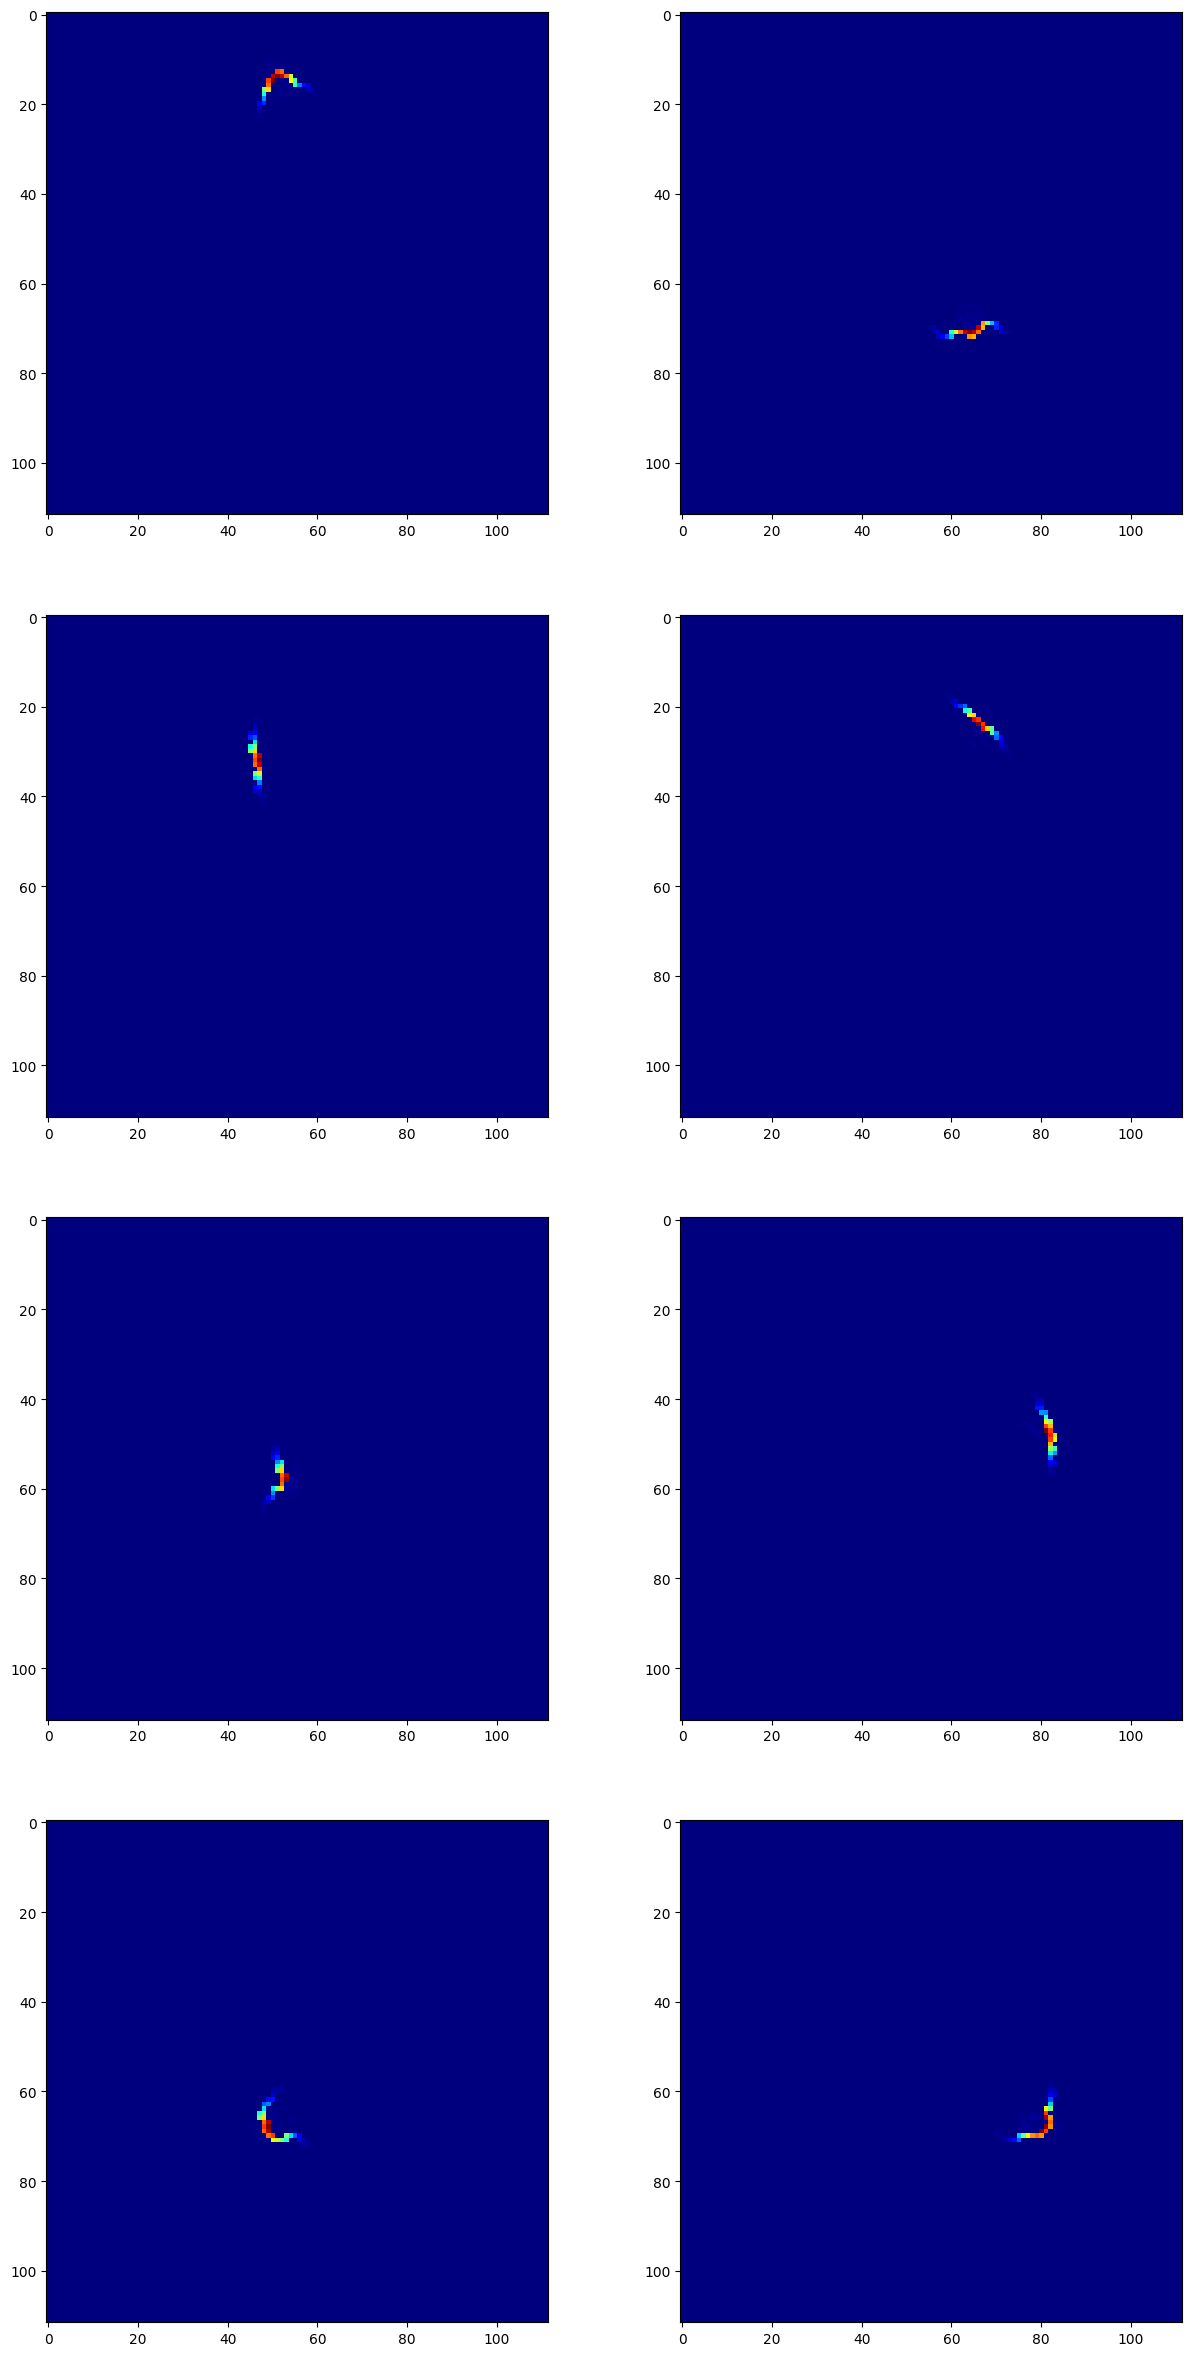

In [213]:
getProbabilisticLandmarks('0X100009310A3BD7FC.avi', volumetracings_df)